In [2]:
%run ./ml_model_init.ipynb

## Baseline Model


In [3]:
# Split the gk data into train and test sets
mid_splits = split_data(mid_player_data)
mid_splits['features_test'].shape[1]

19

#### Linear Model


In [4]:

base_mid_lin_reg = Linear_regression(mid_splits['feature_train'], mid_splits['features_test'],
                               mid_splits['target_train'], mid_splits['target_test'])

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = pd.DataFrame({"base_mid_lin_reg": [base_mid_lin_reg['train_RMSE'], base_mid_lin_reg['test_RMSE'], base_mid_lin_reg['cv_rmse'], base_mid_lin_reg['R2_train'], base_mid_lin_reg['R2_test']]},
                                                        index=(['train_RMSE', 'test_RMSE', 'cv_rmse', 'R2_train', 'R2_test']))

mid_evaluation_stats

Training set RMSE: 1.0195446007545825
Test set RMSE: 1.0201879430317662
Training set R2: 0.8268764433908846
Test set R2: 0.8265383556248853
count    10.000000
mean      1.023139
std       0.034117
min       0.971870
25%       1.005311
50%       1.027532
75%       1.045030
max       1.080341
dtype: float64


,base_mid_lin_reg
train_RMSE,1.019545
test_RMSE,1.020188
cv_rmse,1.023139
R2_train,0.826876
R2_test,0.826538


#### DecisionTree Model


In [5]:
base_mid_dt_reg = DecisionTreeRegression(mid_splits['feature_train'], mid_splits['features_test'],
                               mid_splits['target_train'], mid_splits['target_test'])

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(base_mid_dt_reg = [base_mid_dt_reg['train_RMSE'], base_mid_dt_reg['test_RMSE'], base_mid_dt_reg['cv_rmse'], base_mid_dt_reg['R2_train'], base_mid_dt_reg['R2_test']])

mid_evaluation_stats



Training set RMSE: 5.162654029248878e-15
Test set RMSE: 1.4896636642056484
Training set R2: 1.0
Test set R2: 0.6301551844666592
count    10.000000
mean      1.537918
std       0.068147
min       1.453526
25%       1.495833
50%       1.515967
75%       1.581194
max       1.649349
dtype: float64


,base_mid_lin_reg,base_mid_dt_reg
train_RMSE,1.019545,5.162654e-15
test_RMSE,1.020188,1.489664e+00
cv_rmse,1.023139,1.537918e+00
R2_train,0.826876,1.000000e+00
R2_test,0.826538,6.301552e-01


#### RandomForest Model


In [6]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
base_mid_rf_reg = RandomForestRegression(mid_splits['feature_train'], mid_splits['features_test'],
                               mid_splits['target_train'], mid_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(base_mid_rf_reg = [base_mid_rf_reg['train_RMSE'], base_mid_rf_reg['test_RMSE'], base_mid_rf_reg['cv_rmse'], base_mid_rf_reg['R2_train'], base_mid_rf_reg['R2_test']])

mid_evaluation_stats

count    10.000000
mean      1.096692
std       0.063516
min       0.990340
25%       1.047858
50%       1.102299
75%       1.134899
max       1.190818
dtype: float64


,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg
train_RMSE,1.019545,5.162654e-15,0.797536
test_RMSE,1.020188,1.489664e+00,1.102107
cv_rmse,1.023139,1.537918e+00,1.096692
R2_train,0.826876,1.000000e+00,0.894064
R2_test,0.826538,6.301552e-01,0.797563


#### XgBoost Model


In [7]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
base_mid_xgb_reg = XGBoostRegression(mid_splits['feature_train'], mid_splits['features_test'], mid_splits['target_train'], mid_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(base_mid_xgb_reg = [base_mid_xgb_reg['train_RMSE'], base_mid_xgb_reg['test_RMSE'], base_mid_xgb_reg['cv_rmse'], base_mid_xgb_reg['R2_train'], base_mid_xgb_reg['R2_test']])
mid_evaluation_stats

,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg
train_RMSE,1.019545,5.162654e-15,0.797536,1.057366
test_RMSE,1.020188,1.489664e+00,1.102107,1.173292
cv_rmse,1.023139,1.537918e+00,1.096692,1.170805
R2_train,0.826876,1.000000e+00,0.894064,0.813794
R2_test,0.826538,6.301552e-01,0.797563,0.770567


# Feature engineering


### VarianceThreshold


In [8]:
VT_scaler = StandardScaler()
df_mid_train_scaled = pd.DataFrame(VT_scaler.fit_transform(mid_splits['feature_train']), columns=mid_splits['feature_train'].columns)
df_mid_test_scaled = pd.DataFrame(VT_scaler.transform(mid_splits['features_test']), columns=mid_splits['features_test'].columns)

selector = VarianceThreshold(threshold = 0.1)
selector.fit_transform(df_mid_train_scaled)

mid_threshold_columns = df_mid_train_scaled.columns[selector.get_support()]

mid_threshold_train = df_mid_train_scaled[mid_threshold_columns]
mid_threshold_test = df_mid_test_scaled[mid_threshold_columns]

mid_threshold_train.shape, mid_threshold_test.shape

((6828, 19), (1707, 19))

#### Model(VT)


##### Linear Model


In [9]:

VarT_mid_lin_reg = Linear_regression(mid_threshold_train, mid_threshold_test,
                               mid_splits['target_train'], mid_splits['target_test'])

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(VarT_mid_lin_reg =  [VarT_mid_lin_reg['train_RMSE'], VarT_mid_lin_reg['test_RMSE'], VarT_mid_lin_reg['cv_rmse'], VarT_mid_lin_reg['R2_train'], VarT_mid_lin_reg['R2_test']])

mid_evaluation_stats

Training set RMSE: 1.0195446007545825
Test set RMSE: 1.0201879430317669
Training set R2: 0.8268764433908846
Test set R2: 0.8265383556248851


count    10.000000
mean      1.023139
std       0.034117
min       0.971870
25%       1.005311
50%       1.027532
75%       1.045030
max       1.080341
dtype: float64


,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg
train_RMSE,1.019545,5.162654e-15,0.797536,1.057366,1.019545
test_RMSE,1.020188,1.489664e+00,1.102107,1.173292,1.020188
cv_rmse,1.023139,1.537918e+00,1.096692,1.170805,1.023139
R2_train,0.826876,1.000000e+00,0.894064,0.813794,0.826876
R2_test,0.826538,6.301552e-01,0.797563,0.770567,0.826538


##### DecisionTree Model


In [10]:
VarT_mid_dt_reg = DecisionTreeRegression(mid_threshold_train, mid_threshold_test,
                               mid_splits['target_train'], mid_splits['target_test'])

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(VarT_mid_dt_reg = [VarT_mid_dt_reg['train_RMSE'], VarT_mid_dt_reg['test_RMSE'], VarT_mid_dt_reg['cv_rmse'], VarT_mid_dt_reg['R2_train'], VarT_mid_dt_reg['R2_test']])

mid_evaluation_stats



Training set RMSE: 5.196563808550363e-15
Test set RMSE: 1.5148164938232593
Training set R2: 1.0
Test set R2: 0.6175601524698797
count    10.000000
mean      1.525674
std       0.078150
min       1.430171
25%       1.459184
50%       1.516977
75%       1.601376
max       1.631947
dtype: float64


,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg
train_RMSE,1.019545,5.162654e-15,0.797536,1.057366,1.019545,5.196564e-15
test_RMSE,1.020188,1.489664e+00,1.102107,1.173292,1.020188,1.514816e+00
cv_rmse,1.023139,1.537918e+00,1.096692,1.170805,1.023139,1.525674e+00
R2_train,0.826876,1.000000e+00,0.894064,0.813794,0.826876,1.000000e+00
R2_test,0.826538,6.301552e-01,0.797563,0.770567,0.826538,6.175602e-01


##### RandomForest Model


In [11]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
VarT_mid_rf_reg = RandomForestRegression(mid_threshold_train, mid_threshold_test,
                               mid_splits['target_train'], mid_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(VarT_mid_rf_reg = [VarT_mid_rf_reg['train_RMSE'], VarT_mid_rf_reg['test_RMSE'], VarT_mid_rf_reg['cv_rmse'], VarT_mid_rf_reg['R2_train'], VarT_mid_rf_reg['R2_test']])

mid_evaluation_stats

count    10.000000
mean      1.096935
std       0.063663
min       0.986479
25%       1.048322
50%       1.102858
75%       1.137646
max       1.187643
dtype: float64


,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg
train_RMSE,1.019545,5.162654e-15,0.797536,1.057366,1.019545,5.196564e-15,0.797752
test_RMSE,1.020188,1.489664e+00,1.102107,1.173292,1.020188,1.514816e+00,1.101785
cv_rmse,1.023139,1.537918e+00,1.096692,1.170805,1.023139,1.525674e+00,1.096935
R2_train,0.826876,1.000000e+00,0.894064,0.813794,0.826876,1.000000e+00,0.894006
R2_test,0.826538,6.301552e-01,0.797563,0.770567,0.826538,6.175602e-01,0.797681


##### XgBoost Model


In [12]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
VarT_mid_xgb_reg = XGBoostRegression(mid_threshold_train, mid_threshold_test, mid_splits['target_train'], mid_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(VarT_mid_xgb_reg = [VarT_mid_xgb_reg['train_RMSE'], VarT_mid_xgb_reg['test_RMSE'], VarT_mid_xgb_reg['cv_rmse'], VarT_mid_xgb_reg['R2_train'], VarT_mid_xgb_reg['R2_test']])
mid_evaluation_stats

,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg
train_RMSE,1.019545,5.162654e-15,0.797536,1.057366,1.019545,5.196564e-15,0.797752,1.057366
test_RMSE,1.020188,1.489664e+00,1.102107,1.173292,1.020188,1.514816e+00,1.101785,1.173292
cv_rmse,1.023139,1.537918e+00,1.096692,1.170805,1.023139,1.525674e+00,1.096935,1.170805
R2_train,0.826876,1.000000e+00,0.894064,0.813794,0.826876,1.000000e+00,0.894006,0.813794
R2_test,0.826538,6.301552e-01,0.797563,0.770567,0.826538,6.175602e-01,0.797681,0.770567


### Feature selection techniques


#### K-best features


In [13]:

from sklearn.feature_selection import SelectKBest, mutual_info_regression

k_rf_model = RandomForestRegressor(n_estimators=20,  max_depth=8, criterion='friedman_mse', max_features='sqrt', random_state=18)

score_list  = []

for k in range(1, mid_splits['features_test'].shape[1]):
  selector = SelectKBest(mutual_info_regression, k=k)
  k_sel_X_train =  selector.fit_transform(mid_threshold_train, mid_splits['target_train'])

  k_rf_model.fit(k_sel_X_train, mid_splits['target_train'])

  k_sel_cols = mid_threshold_train.columns[selector.get_support()]
  k_sel_X_test = mid_threshold_test[k_sel_cols]
  score = round(k_rf_model.score(k_sel_X_test.values, mid_splits['target_test'] ), 3)

  score_list.append(score)
print(score_list, score_list.index(max(score_list)))
num_of_feat = score_list.index(max(score_list)) # find the highest score. We will use  that as the value of k

[0.557, 0.608, 0.637, 0.641, 0.668, 0.678, 0.693, 0.664, 0.688, 0.678, 0.692, 0.696, 0.7, 0.689, 0.702, 0.726, 0.716, 0.707] 15


In [14]:
selector = SelectKBest(mutual_info_regression, k=num_of_feat)
selector.fit_transform(mid_threshold_train, mid_splits['target_train'])

sel_feats = selector.get_feature_names_out()
k_sel_X_train = mid_threshold_train[sel_feats]
k_sel_X_test = mid_threshold_test[sel_feats]

##### Model (KBest)


###### Linear Model


In [15]:

KBest_mid_lin_reg = Linear_regression(k_sel_X_train, k_sel_X_test,
                               mid_splits['target_train'], mid_splits['target_test'])

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(KBest_mid_lin_reg =  [KBest_mid_lin_reg['train_RMSE'], KBest_mid_lin_reg['test_RMSE'], KBest_mid_lin_reg['cv_rmse'], KBest_mid_lin_reg['R2_train'], KBest_mid_lin_reg['R2_test']])

mid_evaluation_stats

Training set RMSE: 1.0498568923954243
Test set RMSE: 1.0523598264428067
Training set R2: 0.8164290671250751
Test set R2: 0.815425539681782
count    10.000000
mean      1.052625
std       0.039760
min       0.992466
25%       1.025466
50%       1.057878
75%       1.084363
max       1.104645
dtype: float64


,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg
train_RMSE,1.019545,5.162654e-15,0.797536,1.057366,1.019545,5.196564e-15,0.797752,1.057366,1.049857
test_RMSE,1.020188,1.489664e+00,1.102107,1.173292,1.020188,1.514816e+00,1.101785,1.173292,1.052360
cv_rmse,1.023139,1.537918e+00,1.096692,1.170805,1.023139,1.525674e+00,1.096935,1.170805,1.052625
R2_train,0.826876,1.000000e+00,0.894064,0.813794,0.826876,1.000000e+00,0.894006,0.813794,0.816429
R2_test,0.826538,6.301552e-01,0.797563,0.770567,0.826538,6.175602e-01,0.797681,0.770567,0.815426


###### DecisionTree Model


In [16]:
KBest_mid_dt_reg = DecisionTreeRegression(k_sel_X_train, k_sel_X_test,
                               mid_splits['target_train'], mid_splits['target_test'])

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(KBest_mid_dt_reg = [KBest_mid_dt_reg['train_RMSE'], KBest_mid_dt_reg['test_RMSE'], KBest_mid_dt_reg['cv_rmse'], KBest_mid_dt_reg['R2_train'], KBest_mid_dt_reg['R2_test']])

mid_evaluation_stats



Training set RMSE: 5.37788598863834e-15
Test set RMSE: 1.568771100283577
Training set R2: 1.0
Test set R2: 0.5898315548955743
count    10.000000
mean      1.565668
std       0.105509
min       1.401213
25%       1.483714
50%       1.569372
75%       1.652131
max       1.697902
dtype: float64


,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg,KBest_mid_dt_reg
train_RMSE,1.019545,5.162654e-15,0.797536,1.057366,1.019545,5.196564e-15,0.797752,1.057366,1.049857,5.377886e-15
test_RMSE,1.020188,1.489664e+00,1.102107,1.173292,1.020188,1.514816e+00,1.101785,1.173292,1.052360,1.568771e+00
cv_rmse,1.023139,1.537918e+00,1.096692,1.170805,1.023139,1.525674e+00,1.096935,1.170805,1.052625,1.565668e+00
R2_train,0.826876,1.000000e+00,0.894064,0.813794,0.826876,1.000000e+00,0.894006,0.813794,0.816429,1.000000e+00
R2_test,0.826538,6.301552e-01,0.797563,0.770567,0.826538,6.175602e-01,0.797681,0.770567,0.815426,5.898316e-01


###### RandomForest Model


In [17]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
KBest_mid_rf_reg = RandomForestRegression(k_sel_X_train, k_sel_X_test,
                               mid_splits['target_train'], mid_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(KBest_mid_rf_reg = [KBest_mid_rf_reg['train_RMSE'], KBest_mid_rf_reg['test_RMSE'], KBest_mid_rf_reg['cv_rmse'], KBest_mid_rf_reg['R2_train'], KBest_mid_rf_reg['R2_test']])

mid_evaluation_stats

count    10.000000
mean      1.120048
std       0.059963
min       1.018356
25%       1.081244
50%       1.131029
75%       1.155284
max       1.219418
dtype: float64


,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg,KBest_mid_dt_reg,KBest_mid_rf_reg
train_RMSE,1.019545,5.162654e-15,0.797536,1.057366,1.019545,5.196564e-15,0.797752,1.057366,1.049857,5.377886e-15,0.827938
test_RMSE,1.020188,1.489664e+00,1.102107,1.173292,1.020188,1.514816e+00,1.101785,1.173292,1.052360,1.568771e+00,1.124151
cv_rmse,1.023139,1.537918e+00,1.096692,1.170805,1.023139,1.525674e+00,1.096935,1.170805,1.052625,1.565668e+00,1.120048
R2_train,0.826876,1.000000e+00,0.894064,0.813794,0.826876,1.000000e+00,0.894006,0.813794,0.816429,1.000000e+00,0.885833
R2_test,0.826538,6.301552e-01,0.797563,0.770567,0.826538,6.175602e-01,0.797681,0.770567,0.815426,5.898316e-01,0.789383


###### XgBoost Model


In [18]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
KBest_mid_xgb_reg = XGBoostRegression(k_sel_X_train, k_sel_X_test, mid_splits['target_train'], mid_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(KBest_mid_xgb_reg = [KBest_mid_xgb_reg['train_RMSE'], KBest_mid_xgb_reg['test_RMSE'], KBest_mid_xgb_reg['cv_rmse'], KBest_mid_xgb_reg['R2_train'], KBest_mid_xgb_reg['R2_test']])
mid_evaluation_stats

,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg,KBest_mid_dt_reg,KBest_mid_rf_reg,KBest_mid_xgb_reg
train_RMSE,1.019545,5.162654e-15,0.797536,1.057366,1.019545,5.196564e-15,0.797752,1.057366,1.049857,5.377886e-15,0.827938,1.075947
test_RMSE,1.020188,1.489664e+00,1.102107,1.173292,1.020188,1.514816e+00,1.101785,1.173292,1.052360,1.568771e+00,1.124151,1.190149
cv_rmse,1.023139,1.537918e+00,1.096692,1.170805,1.023139,1.525674e+00,1.096935,1.170805,1.052625,1.565668e+00,1.120048,1.190345
R2_train,0.826876,1.000000e+00,0.894064,0.813794,0.826876,1.000000e+00,0.894006,0.813794,0.816429,1.000000e+00,0.885833,0.807192
R2_test,0.826538,6.301552e-01,0.797563,0.770567,0.826538,6.175602e-01,0.797681,0.770567,0.815426,5.898316e-01,0.789383,0.763927


#### Mutual Information


In [19]:
from sklearn.feature_selection import mutual_info_regression
# def_sel_X_train
mutual_info = mutual_info_regression(k_sel_X_train, mid_splits['target_train'])
mutual_info

array([0.40893562, 0.01834657, 0.16525448, 0.15041307, 0.17820852,
       0.16118906, 0.23360011, 0.33577758, 0.42525182, 0.07536474,
       0.21836139, 0.05304891, 0.1050198 , 0.18573469, 0.23439602])

In [20]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = k_sel_X_train.columns
mutual_info.sort_values(ascending=False)

ict_index                     0.425252
minutes                       0.408936
clean_sheets                  0.335778
xP                            0.234396
expected_goal_involvements    0.233600
threat                        0.218361
xGChain                       0.185735
npxG                          0.178209
expected_goals                0.165254
shots                         0.161189
expected_assists              0.150413
key_passes                    0.105020
xGBuildup                     0.075365
value                         0.053049
red_cards                     0.018347
dtype: float64

<Axes: >

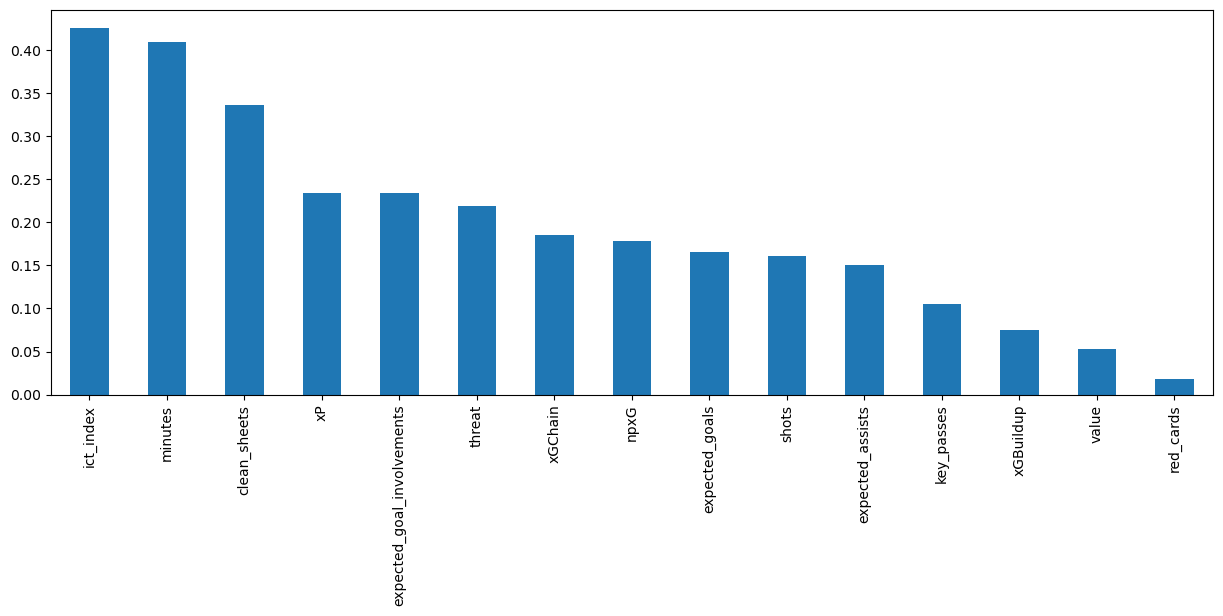

In [21]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

##### Select to 20% perct


In [22]:
from sklearn.feature_selection import SelectPercentile

## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(k_sel_X_train, mid_splits['target_train'])

selected_top_columns.get_support()

array([ True, False, False, False, False, False,  True,  True,  True,
       False,  True, False, False,  True,  True])

In [23]:
mid_20_columns = k_sel_X_train.columns[selected_top_columns.get_support()]

mid_20_train = k_sel_X_train[mid_20_columns]
mid_20_test = k_sel_X_test[mid_20_columns]


##### Model (MI)


###### Linear Model


In [24]:

MI_mid_lin_reg = Linear_regression(mid_20_train, mid_20_test,
                               mid_splits['target_train'], mid_splits['target_test'])

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(MI_mid_lin_reg =  [MI_mid_lin_reg['train_RMSE'], MI_mid_lin_reg['test_RMSE'], MI_mid_lin_reg['cv_rmse'], MI_mid_lin_reg['R2_train'], MI_mid_lin_reg['R2_test']])

mid_evaluation_stats

Training set RMSE: 1.4842037543698452
Test set RMSE: 1.4939975937641587
Training set R2: 0.633114321667051
Test set R2: 0.6280000496190561
count    10.000000
mean      1.485547
std       0.046003
min       1.423265
25%       1.447765
50%       1.493820
75%       1.505271
max       1.570345
dtype: float64


,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg,KBest_mid_dt_reg,KBest_mid_rf_reg,KBest_mid_xgb_reg,MI_mid_lin_reg
train_RMSE,1.019545,5.162654e-15,0.797536,1.057366,1.019545,5.196564e-15,0.797752,1.057366,1.049857,5.377886e-15,0.827938,1.075947,1.484204
test_RMSE,1.020188,1.489664e+00,1.102107,1.173292,1.020188,1.514816e+00,1.101785,1.173292,1.052360,1.568771e+00,1.124151,1.190149,1.493998
cv_rmse,1.023139,1.537918e+00,1.096692,1.170805,1.023139,1.525674e+00,1.096935,1.170805,1.052625,1.565668e+00,1.120048,1.190345,1.485547
R2_train,0.826876,1.000000e+00,0.894064,0.813794,0.826876,1.000000e+00,0.894006,0.813794,0.816429,1.000000e+00,0.885833,0.807192,0.633114
R2_test,0.826538,6.301552e-01,0.797563,0.770567,0.826538,6.175602e-01,0.797681,0.770567,0.815426,5.898316e-01,0.789383,0.763927,0.628000


###### DecisionTree Model


In [25]:
MI_mid_dt_reg = DecisionTreeRegression(mid_20_train, mid_20_test,
                               mid_splits['target_train'], mid_splits['target_test'])

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(MI_mid_dt_reg = [MI_mid_dt_reg['train_RMSE'], MI_mid_dt_reg['test_RMSE'], MI_mid_dt_reg['cv_rmse'], MI_mid_dt_reg['R2_train'], MI_mid_dt_reg['R2_test']])

mid_evaluation_stats



Training set RMSE: 3.580530070806004e-15
Test set RMSE: 1.984710155043134
Training set R2: 1.0
Test set R2: 0.34349616165623453
count    10.000000
mean      1.895371
std       0.085903
min       1.748875
25%       1.851951
50%       1.895956
75%       1.975215
max       2.001832
dtype: float64


,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg,KBest_mid_dt_reg,KBest_mid_rf_reg,KBest_mid_xgb_reg,MI_mid_lin_reg,MI_mid_dt_reg
train_RMSE,1.019545,5.162654e-15,0.797536,1.057366,1.019545,5.196564e-15,0.797752,1.057366,1.049857,5.377886e-15,0.827938,1.075947,1.484204,3.580530e-15
test_RMSE,1.020188,1.489664e+00,1.102107,1.173292,1.020188,1.514816e+00,1.101785,1.173292,1.052360,1.568771e+00,1.124151,1.190149,1.493998,1.984710e+00
cv_rmse,1.023139,1.537918e+00,1.096692,1.170805,1.023139,1.525674e+00,1.096935,1.170805,1.052625,1.565668e+00,1.120048,1.190345,1.485547,1.895371e+00
R2_train,0.826876,1.000000e+00,0.894064,0.813794,0.826876,1.000000e+00,0.894006,0.813794,0.816429,1.000000e+00,0.885833,0.807192,0.633114,1.000000e+00
R2_test,0.826538,6.301552e-01,0.797563,0.770567,0.826538,6.175602e-01,0.797681,0.770567,0.815426,5.898316e-01,0.789383,0.763927,0.628000,3.434962e-01


###### RandomForest Model


In [26]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
MI_mid_rf_reg = RandomForestRegression(mid_20_train, mid_20_test,
                               mid_splits['target_train'], mid_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(MI_mid_rf_reg = [MI_mid_rf_reg['train_RMSE'], MI_mid_rf_reg['test_RMSE'], MI_mid_rf_reg['cv_rmse'], MI_mid_rf_reg['R2_train'], MI_mid_rf_reg['R2_test']])

mid_evaluation_stats

count    10.000000
mean      1.392438
std       0.079906
min       1.275682
25%       1.343161
50%       1.376492
75%       1.416154
max       1.552115
dtype: float64


,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg,KBest_mid_dt_reg,KBest_mid_rf_reg,KBest_mid_xgb_reg,MI_mid_lin_reg,MI_mid_dt_reg,MI_mid_rf_reg
train_RMSE,1.019545,5.162654e-15,0.797536,1.057366,1.019545,5.196564e-15,0.797752,1.057366,1.049857,5.377886e-15,0.827938,1.075947,1.484204,3.580530e-15,1.083228
test_RMSE,1.020188,1.489664e+00,1.102107,1.173292,1.020188,1.514816e+00,1.101785,1.173292,1.052360,1.568771e+00,1.124151,1.190149,1.493998,1.984710e+00,1.385732
cv_rmse,1.023139,1.537918e+00,1.096692,1.170805,1.023139,1.525674e+00,1.096935,1.170805,1.052625,1.565668e+00,1.120048,1.190345,1.485547,1.895371e+00,1.392438
R2_train,0.826876,1.000000e+00,0.894064,0.813794,0.826876,1.000000e+00,0.894006,0.813794,0.816429,1.000000e+00,0.885833,0.807192,0.633114,1.000000e+00,0.804573
R2_test,0.826538,6.301552e-01,0.797563,0.770567,0.826538,6.175602e-01,0.797681,0.770567,0.815426,5.898316e-01,0.789383,0.763927,0.628000,3.434962e-01,0.679962


###### XgBoost Model


In [27]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
MI_mid_xgb_reg = XGBoostRegression(k_sel_X_train, k_sel_X_test, mid_splits['target_train'], mid_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(MI_mid_xgb_reg = [MI_mid_xgb_reg['train_RMSE'], MI_mid_xgb_reg['test_RMSE'], MI_mid_xgb_reg['cv_rmse'], MI_mid_xgb_reg['R2_train'], MI_mid_xgb_reg['R2_test']])
mid_evaluation_stats

,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg,KBest_mid_dt_reg,KBest_mid_rf_reg,KBest_mid_xgb_reg,MI_mid_lin_reg,MI_mid_dt_reg,MI_mid_rf_reg,MI_mid_xgb_reg
train_RMSE,1.019545,5.162654e-15,0.797536,1.057366,1.019545,5.196564e-15,0.797752,1.057366,1.049857,5.377886e-15,0.827938,1.075947,1.484204,3.580530e-15,1.083228,1.075947
test_RMSE,1.020188,1.489664e+00,1.102107,1.173292,1.020188,1.514816e+00,1.101785,1.173292,1.052360,1.568771e+00,1.124151,1.190149,1.493998,1.984710e+00,1.385732,1.190149
cv_rmse,1.023139,1.537918e+00,1.096692,1.170805,1.023139,1.525674e+00,1.096935,1.170805,1.052625,1.565668e+00,1.120048,1.190345,1.485547,1.895371e+00,1.392438,1.190345
R2_train,0.826876,1.000000e+00,0.894064,0.813794,0.826876,1.000000e+00,0.894006,0.813794,0.816429,1.000000e+00,0.885833,0.807192,0.633114,1.000000e+00,0.804573,0.807192
R2_test,0.826538,6.301552e-01,0.797563,0.770567,0.826538,6.175602e-01,0.797681,0.770567,0.815426,5.898316e-01,0.789383,0.763927,0.628000,3.434962e-01,0.679962,0.763927


# Best Stats


In [28]:
mid_evaluation_stats

,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg,KBest_mid_dt_reg,KBest_mid_rf_reg,KBest_mid_xgb_reg,MI_mid_lin_reg,MI_mid_dt_reg,MI_mid_rf_reg,MI_mid_xgb_reg
train_RMSE,1.019545,5.162654e-15,0.797536,1.057366,1.019545,5.196564e-15,0.797752,1.057366,1.049857,5.377886e-15,0.827938,1.075947,1.484204,3.580530e-15,1.083228,1.075947
test_RMSE,1.020188,1.489664e+00,1.102107,1.173292,1.020188,1.514816e+00,1.101785,1.173292,1.052360,1.568771e+00,1.124151,1.190149,1.493998,1.984710e+00,1.385732,1.190149
cv_rmse,1.023139,1.537918e+00,1.096692,1.170805,1.023139,1.525674e+00,1.096935,1.170805,1.052625,1.565668e+00,1.120048,1.190345,1.485547,1.895371e+00,1.392438,1.190345
R2_train,0.826876,1.000000e+00,0.894064,0.813794,0.826876,1.000000e+00,0.894006,0.813794,0.816429,1.000000e+00,0.885833,0.807192,0.633114,1.000000e+00,0.804573,0.807192
R2_test,0.826538,6.301552e-01,0.797563,0.770567,0.826538,6.175602e-01,0.797681,0.770567,0.815426,5.898316e-01,0.789383,0.763927,0.628000,3.434962e-01,0.679962,0.763927


In [29]:
# Midfielders
#### xgb Model under the MI performed better